In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import helper_functions

In [2]:
torch.__version__, torchvision.__version__

('2.4.1', '0.19.1')

In [3]:
train_data = datasets.FashionMNIST(
    root = "data", 
    train = True, 
    download = True, 
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image, label = train_data[0]

In [6]:
image, label, image.shape

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
image.shape, label ## images are in the order Channel * Height * Width

(torch.Size([1, 28, 28]), 9)

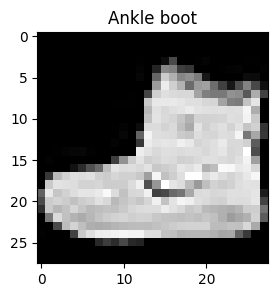

In [11]:
plt.figure(figsize=(5,3))
plt.imshow(image.squeeze(), cmap='grey')
plt.title(class_names[label])
plt.axis = False

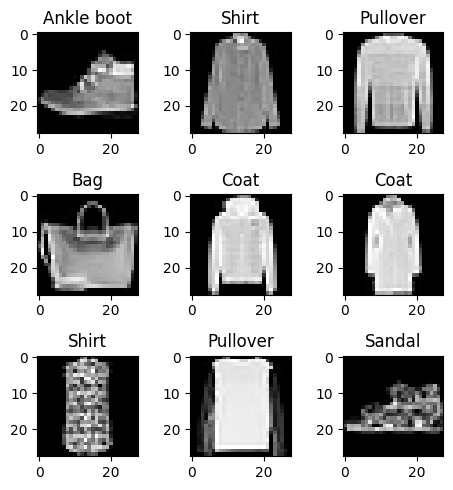

In [12]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(5,5))
rows, cols = 3,3
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap='grey')
    plt.title(class_names[label])
    plt.axis = False
    plt.tight_layout()

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### BATCHING

In [14]:
from torch.utils.data import DataLoader

In [15]:
BATCH_SIZE = 32
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    shuffle = False,
    batch_size = BATCH_SIZE
)

In [16]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1b494ee7890>,
 <torch.utils.data.dataloader.DataLoader at 0x1b494e946e0>)

In [17]:
# train_dataloader.__getitem__() this is something different, check later

In [18]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [19]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'T-shirt/top')

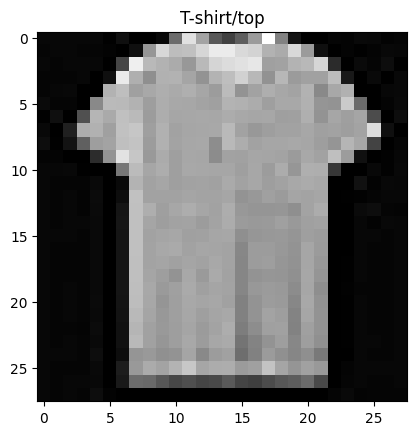

In [20]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='grey')
plt.title(class_names[label])

### BASELINE

In [21]:
train_features_batch[0].shape

torch.Size([1, 28, 28])

In [22]:
flatten_model = nn.Flatten()
op = flatten_model(train_features_batch[0])
op.shape

torch.Size([1, 784])

In [23]:
class MNIST_V0(nn.Module):
    def __init__(self, input_features = 28*28, output_features = len(class_names), hidden_neurons = 16):
        super().__init__()
        self.flatten_block = nn.Sequential(
            nn.Flatten()
        )

        self.block1 = nn.Sequential(
            nn.Linear(in_features = input_features, out_features = hidden_neurons),
            nn.ReLU(),
            nn.Linear(in_features = hidden_neurons, out_features = hidden_neurons),
            nn.ReLU(),
            nn.Linear(in_features = hidden_neurons, out_features = output_features)
        )
 
    def forward(self, x):
        x = self.flatten_block(x)
        x = self.block1(x)
        return x

In [24]:
torch.manual_seed(42)
model0 = MNIST_V0().to('cpu')

In [25]:
len(train_features_batch) ## 128 images in a batch

32

In [26]:
model0(train_features_batch).shape ## there can be 10 values for a single image, there are 128 images..

torch.Size([32, 10])

In [27]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

In [28]:
from tqdm.notebook import tqdm as tqdm
torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(1, epochs+1)):
    print(f"EPOCH : {epoch} \n---- ")
    total_train_loss, total_train_acc = 0, 0
    for batch, (X_train, y_train) in enumerate(train_dataloader):
        ## put the model in train mode
        model0.train()
        ## get the train preds ( logits and lables)
        train_logits = model0(X_train)
        train_preds = torch.argmax(torch.softmax(train_logits, dim=1), dim=1)
        ## calculate the train loss for a batch and the add it to total_train_loss
        ## train loss is calculated with logits and not labels
        ## to check train acc we can use train labels
        # print(len(train_preds))
        train_loss = loss_func(train_logits, y_train)
        total_train_loss += train_loss
        train_acc = helper_functions.accuracy_fn(y_pred=train_preds, y_true = y_train)
        total_train_acc += train_acc
        ## zero_grad the mode
        ## we can zero grad the optimizer also, but doing that is not preferred, why ?
        model0.zero_grad()
        ## backprop
        ## we will backprop on batch_loss and not the whole loss
        train_loss.backward()
        ## updates
        optimizer.step()
        ## look at how many images have beed trained
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X_train)} / {len(train_dataloader.dataset)} smaples.")
    ## since total loss was calc above we are avg. it (loss and acc)
    total_train_loss /= len(train_dataloader)
    total_train_acc /= len(train_dataloader)

    ## TEST loop
    total_test_loss, total_test_acc = 0, 0
    model0.eval()
    with torch.inference_mode():
        ## there are test bactches and from those batches we are taking images as X_test and labels as y_test
        for (X_test, y_test) in (test_dataloader):
            ## forward calculates logits then we take argmax with softmax to calculates label preds
            test_logits = model0(X_test)
            test_preds = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)
            ## loss and acc
            ## loss is calc with logits and acc is calc with preds
            test_loss = loss_func(test_logits, y_test)
            total_test_loss += test_loss
            test_acc = helper_functions.accuracy_fn(y_true = y_test, y_pred = test_preds)
            total_test_acc += test_acc
        ## avg. loss and acc
        total_test_loss /= len(test_dataloader)
        total_test_acc /= len(test_dataloader)

    print(f"Train loss : {total_train_loss:.5f} | Test loss : {total_test_loss:.5f} | Test acc : {total_test_acc:.2f}% | Train acc : {total_train_acc:.2f}%")

  0%|          | 0/3 [00:00<?, ?it/s]

EPOCH : 1 
---- 
Looked at 0 / 60000 smaples.
Looked at 12800 / 60000 smaples.
Looked at 25600 / 60000 smaples.
Looked at 38400 / 60000 smaples.
Looked at 51200 / 60000 smaples.
Train loss : 0.65797 | Test loss : 0.48257 | Test acc : 82.21% | Train acc : 75.85%
EPOCH : 2 
---- 
Looked at 0 / 60000 smaples.
Looked at 12800 / 60000 smaples.
Looked at 25600 / 60000 smaples.
Looked at 38400 / 60000 smaples.
Looked at 51200 / 60000 smaples.
Train loss : 0.45984 | Test loss : 0.49253 | Test acc : 81.99% | Train acc : 83.29%
EPOCH : 3 
---- 
Looked at 0 / 60000 smaples.
Looked at 12800 / 60000 smaples.
Looked at 25600 / 60000 smaples.
Looked at 38400 / 60000 smaples.
Looked at 51200 / 60000 smaples.
Train loss : 0.41952 | Test loss : 0.45026 | Test acc : 83.52% | Train acc : 84.78%


### Make model predictions

In [29]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module,
               accuracy_func: helper_functions.accuracy_fn,
               device: torch.device = 'cpu'):

    total_loss, total_acc = 0, 0
    model.eval()
    model = model.to(device)
    with torch.inference_mode():
        for X_test, y_test in tqdm(dataloader):
            X_test = X_test.to(device)
            y_test = y_test.to(device)    
            test_logits = model(X_test)
            test_preds = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

            total_loss += loss_func(test_logits, y_test)
            total_acc += accuracy_func(y_true = y_test, y_pred = test_preds)
        
        total_loss /= len(dataloader)
        total_acc /= len(dataloader)
    return {"model_name":model.__class__.__name__,
            "model_loss":total_loss.item(),
            "model_acc":total_acc}

In [30]:
model0_results = eval_model(model=model0, 
                            dataloader=test_dataloader, 
                            loss_func=loss_func, 
                            accuracy_func=helper_functions.accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [31]:
model0_results

{'model_name': 'MNIST_V0',
 'model_loss': 0.45026063919067383,
 'model_acc': 83.51637380191693}

# ON GPU

In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [33]:
torch.manual_seed(42)
model1 = MNIST_V0(input_features=784, output_features=len(class_names))

In [34]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

In [35]:
def classification_train_step(model: nn.Module,
                              dataloader: torch.utils.data.DataLoader,
                              loss_func = nn.Module,
                              optimizer = torch.optim,
                              accuracy_func = helper_functions.accuracy_fn,
                              device = torch.device):
    """ TRAIN  STEP FOR CLASSIFICATION MODEL"""
    total_train_loss, total_train_acc = 0, 0
    model = model.to(device)
    for batch, (X_train, y_train) in enumerate(dataloader):
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        ## put the model in train mode
        model.train()
        ## get the train preds ( logits and lables)
        train_logits = model(X_train)
        train_preds = torch.argmax(torch.softmax(train_logits, dim=1), dim=1)
        ## calculate the train loss for a batch and the add it to total_train_loss
        ## train loss is calculated with logits and not labels
        ## to check train acc we can use train labels
        # print(len(train_preds))
        train_loss = loss_func(train_logits, y_train)
        total_train_loss += train_loss
        train_acc = helper_functions.accuracy_fn(y_pred=train_preds, y_true = y_train)
        total_train_acc += train_acc
        ## zero_grad the mode
        ## we can zero grad the optimizer also, but doing that is not preferred, why ?
        model.zero_grad()
        ## backprop
        ## we will backprop on batch_loss and not the whole loss
        train_loss.backward()
        ## updates
        optimizer.step()
        ## look at how many images have beed trained
    ## since total loss was calc above we are avg. it (loss and acc)
    total_train_loss /= len(train_dataloader)
    total_train_acc /= len(train_dataloader)

    print(f"Train loss : {total_train_loss:.5f} | Train acc : {total_train_acc:.2f}%")

In [36]:
def classification_test_step(model: nn.Module,
                              dataloader: torch.utils.data.DataLoader,
                              loss_func = nn.Module,
                              accuracy_func = helper_functions.accuracy_fn,
                              device = torch.device):
    """ TEST STEP FOR CLASSIFICATION MODEL"""
    total_test_loss, total_test_acc = 0, 0
    model = model.to(device)
    model.eval()
    with torch.inference_mode():
        ## there are test bactches and from those batches we are taking images as X_test and labels as y_test
        for (X_test, y_test) in (dataloader):
            X_test = X_test.to(device)
            y_test = y_test.to(device)
            ## forward calculates logits then we take argmax with softmax to calculates label preds
            test_logits = model(X_test)
            test_preds = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)
            ## loss and acc
            ## loss is calc with logits and acc is calc with preds
            test_loss = loss_func(test_logits, y_test)
            total_test_loss += test_loss
            test_acc = helper_functions.accuracy_fn(y_true = y_test, y_pred = test_preds)
            total_test_acc += test_acc
        ## avg. loss and acc
        total_test_loss /= len(test_dataloader)
        total_test_acc /= len(test_dataloader)
        
    print(f"Test loss : {total_test_loss:.5f} | Test acc : {total_test_acc:.2f}%")

In [37]:
epochs = 3
for epoch in tqdm(range(epochs)):
    classification_train_step(model= model1, 
                              dataloader=train_dataloader, 
                              device = device,
                              optimizer=optimizer, 
                              loss_func=loss_func)
    classification_test_step(model= model1, 
                              dataloader=test_dataloader, 
                              device = device,
                              loss_func=loss_func)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss : 0.67093 | Train acc : 75.16%
Test loss : 0.52879 | Test acc : 80.11%
Train loss : 0.46967 | Train acc : 82.97%
Test loss : 0.48115 | Test acc : 82.90%
Train loss : 0.43020 | Train acc : 84.43%
Test loss : 0.44095 | Test acc : 84.13%


In [38]:
model1_results = eval_model(model=model1, 
                            dataloader=test_dataloader, 
                            loss_func=loss_func, 
                            accuracy_func=helper_functions.accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [39]:
model0_results, model1_results

({'model_name': 'MNIST_V0',
  'model_loss': 0.45026063919067383,
  'model_acc': 83.51637380191693},
 {'model_name': 'MNIST_V0',
  'model_loss': 0.4409516155719757,
  'model_acc': 84.12539936102236})

## CNN

In [49]:
class FashinMNIST_V2(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size = 3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7, 
                      out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block1(x)
        #print(x.shape)
        x = self.conv_block2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [50]:
torch.manual_seed(42)
model2 = FashinMNIST_V2(input_shape=1,
                        output_shape=len(class_names),
                        hidden_units = 10).to(device)

In [51]:
model2

FashinMNIST_V2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Test run to verify shape

In [52]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [53]:
model2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0276, -0.0354,  0.0448, -0.0097, -0.0473,  0.0209,  0.0434, -0.0504,
          0.0213, -0.0634]], device='cuda:0', grad_fn=<AddmmBackward0>)

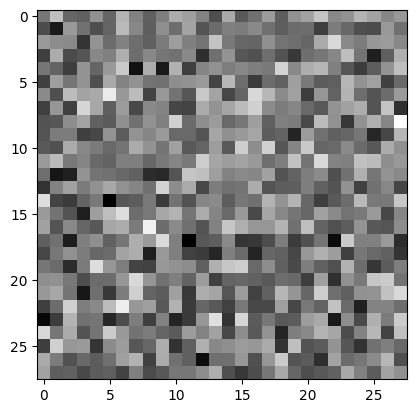

In [54]:
plt.imshow(rand_image_tensor.squeeze(), cmap='grey')

### Optimizers and loss functions

In [55]:
from helper_functions import accuracy_fn
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model2.parameters(), lr=0.1)

In [56]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 3
for epoch in tqdm(range(epochs)):
    classification_train_step(model=model2, 
                              dataloader=train_dataloader, 
                              loss_func=loss_func, 
                              optimizer=optimizer,
                              device=device)
    
    classification_test_step(model=model2, 
                             dataloader=test_dataloader, 
                             loss_func=loss_func, 
                             accuracy_func=accuracy_fn,
                             device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss : 0.52713 | Train acc : 80.99%
Test loss : 0.36812 | Test acc : 86.70%
Train loss : 0.34777 | Train acc : 87.58%
Test loss : 0.34898 | Test acc : 87.69%
Train loss : 0.31216 | Train acc : 88.89%
Test loss : 0.32608 | Test acc : 88.09%


In [59]:
model2_results = eval_model(model=model2, 
                            dataloader=test_dataloader, 
                            loss_func=loss_func,
                            accuracy_func=accuracy_fn,
                            device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [61]:
model2_results

{'model_name': 'FashinMNIST_V2',
 'model_loss': 0.3260805010795593,
 'model_acc': 88.08905750798722}

### confusion matrix

In [67]:
from torchmetrics import ConfusionMatrix

In [ ]:
y_preds = []
model2.eval()
with torch.inference_mode():
    X_test, y_test = X_test.to(device), y.to(device)
    y_logits = model2(X_test)
    y_preds = torch.softmax(torch.argmax(y_logits, dim=1)